# Gram-Schmidt process

## Instructions
In this assignment you will write a function to perform the Gram-Schmidt procedure, which takes a list of vectors and forms an orthonormal basis from this set.
As a corollary, the procedure allows us to determine the dimension of the space spanned by the basis vectors, which is equal to or less than the space which the vectors sit.

You'll start by completing a function for 4 basis vectors, before generalising to when an arbitrary number of vectors are given.

Again, a framework for the function has already been written.
Look through the code, and you'll be instructed where to make changes.
We'll do the first two rows, and you can use this as a guide to do the last two.

### Matrices in Python
Remember the structure for matrices in *numpy* is,
```python
A[0, 0]  A[0, 1]  A[0, 2]  A[0, 3]
A[1, 0]  A[1, 1]  A[1, 2]  A[1, 3]
A[2, 0]  A[2, 1]  A[2, 2]  A[2, 3]
A[3, 0]  A[3, 1]  A[3, 2]  A[3, 3]
```
You can access the value of each element individually using,
```python
A[n, m]
```
You can also access a whole row at a time using,
```python
A[n]
```

Building on last assignment, in this exercise you will need to select whole columns at a time.
This can be done with,
```python
A[:, m]
```
which will select the m'th column (starting at zero).

In this exercise, you will need to take the dot product between vectors. This can be done using the @ operator.
To dot product vectors u and v, use the code,
```python
u @ v
```

All the code you should complete will be at the same level of indentation as the instruction comment.

### How to submit
Edit the code in the cell below to complete the assignment.
Once you are finished and happy with it, press the *Submit Assignment* button at the top of this notebook.

Please don't change any of the function names, as these will be checked by the grading script.

If you have further questions about submissions or programming assignments, here is a [list](https://www.coursera.org/learn/linear-algebra-machine-learning/discussions/weeks/1/threads/jB4klkn5EeibtBIQyzFmQg) of Q&A. You can also raise an issue on the discussion forum. Good luck!

In [2]:
# GRADED FUNCTION
import numpy as np
import numpy.linalg as la

V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)

def gsBasis4(A) :
    # print("start V:\n", V)
    B = np.array(A, dtype=np.float_)
    print('B0 norm',la.norm(B[:, 0]))
    print('B0', B[:, 0])
    B[:, 0] = B[:, 0] / la.norm(B[:, 0])
    print('B0', B[:, 0])
    # For the first column, we need to subtract any overlap with our new zeroth vector.
    # Первый столбец просто нормируем
    print('B1', B[:, 1])
    print('B1 @ B0', B[:, 1] @ B[:, 0])
    B[:, 1] = B[:, 1] - B[:, 1] @ B[:, 0] * B[:, 0]
    print('B1', B[:, 1])
    # If there's anything left after that subtraction, then B[:, 1] is linearly independant of B[:, 0]
    # If this is the case, we can normalise it. Otherwise we'll set that vector to zero.
gsBasis4(V)




B0 norm 2.449489742783178
B0 [1. 0. 2. 1.]
B0 [0.40824829 0.         0.81649658 0.40824829]
B1 [ 0.  1.  8. -6.]
B1 @ B0 4.082482904638631
B1 [-1.66666667  1.          4.66666667 -7.66666667]


In [3]:
import math
# norma
math.sqrt(1**2 + 0**2 + 2**2 + 1**2)

2.449489742783178

In [29]:
X = np.array([1,0,2,6])
X_norm = X / la.norm(X)
Y = np.array([2,0,4,12])
Y_new = Y @ X_norm * X_norm

print('длинна вектора Х', la.norm(X))
print('отнормированный вектор Х', X_norm)
print('скалярное произведение Y @ X_norm', Y @ X_norm)
print(np.round(Y - Y_new))
# т.к. скалярное произведение характеризует отношение длин векторов и угла между ними
# то если они сонаправлены то характеризует только отношение длин
# соответственно если мы сначала отнормировали вектор потом нашли отношение длин
# и умножили это отношение на вектор то получим другой вектор
# ,а если получим тотже значит вектора сонаправленны
# 
# когда мы находим скалярное произведение которое характеризует длины вектора и косинус угла,
# в этот момент у нас длинна одного вектора уже единица поэтому
# по сути мы находим длину вектора умноженную на косинус угла между векторами
# а это в свою очередь проекция одного вектора на другой - скаляр (число)
# потом мы умножаем это число на сам вектор и получаем вектор proj_b1_a2 на рисунке
# далее мы вычитаем из одного вектора другой и получаем перпендикуляр
# т.к. второй вектор это проекция значит разница будет перпендикуляр

длинна вектора Х 6.4031242374328485
отнормированный вектор Х [0.15617376 0.         0.31234752 0.93704257]
скалярное произведение Y @ X_norm 12.806248474865699
[-0.  0. -0. -0.]


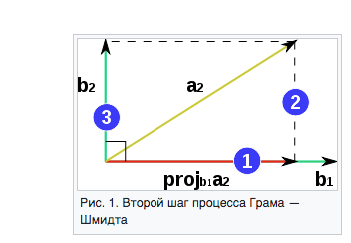

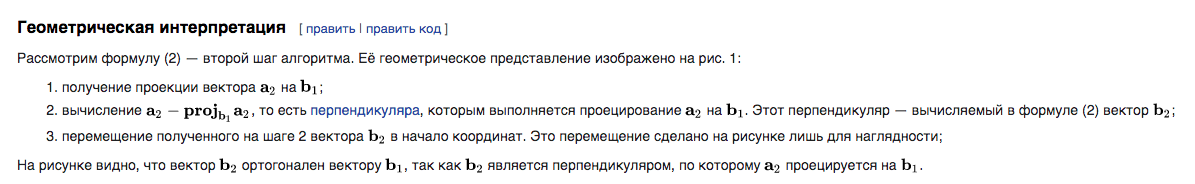

In [30]:
X = np.array([1,2,3])
X_norm = X / la.norm(X)
Y = np.array([2,4,6])
Y_new = Y @ X_norm * X_norm
Y_norm = np.round(Y - Y_new,2)/la.norm(np.round(Y - Y_new,2))

print('длинна вектора Х', la.norm(X))
print('отнормированный вектор Х', X_norm)
print('скалярное произведение X Y', Y @ X_norm)
print('X_new', X_norm)
print('Y_norm', Y_norm)

длинна вектора Х 3.7416573867739413
отнормированный вектор Х [0.26726124 0.53452248 0.80178373]
скалярное произведение X Y 7.483314773547883
X_new [0.26726124 0.53452248 0.80178373]
Y_norm [nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


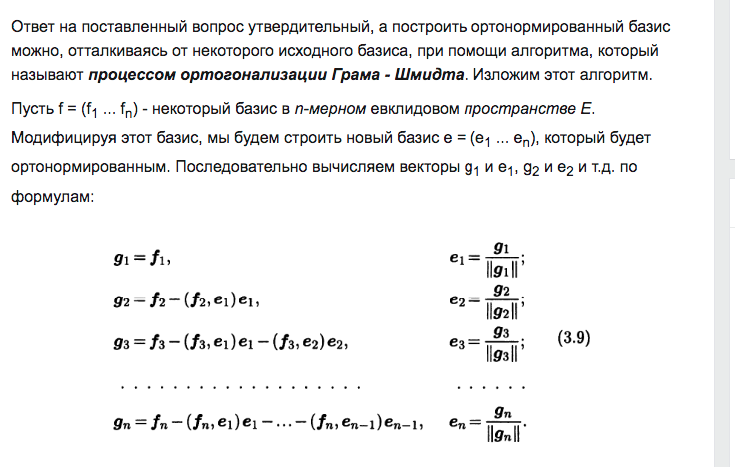

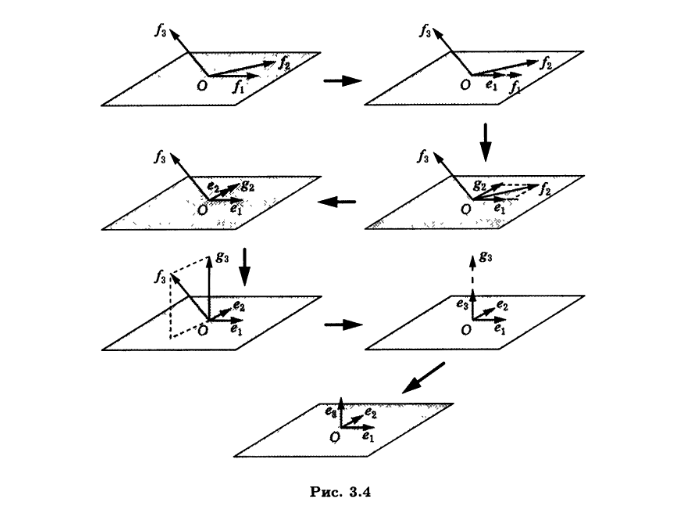

In [16]:
# GRADED FUNCTION
import numpy as np
import numpy.linalg as la

verySmallNumber = 1e-14 # That's 1×10⁻¹⁴ = 0.00000000000001
V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)

# Our first function will perform the Gram-Schmidt procedure for 4 basis vectors.
# We'll take this list of vectors as the columns of a matrix, A.
# We'll then go through the vectors one at a time and set them to be orthogonal
# to all the vectors that came before it. Before normalising.
# Follow the instructions inside the function at each comment.
# You will be told where to add code to complete the function.
def gsBasis4(A) :
    print("start V:\n", V)
    B = np.array(A, dtype=np.float_) # Make B as a copy of A, since we're going to alter it's values.
    # The zeroth column is easy, since it has no other vectors to make it normal to.
    # All that needs to be done is to normalise it. I.e. divide by its modulus, or norm.
    B[:, 0] = B[:, 0] / la.norm(B[:, 0])
    print("after zeroth column:\n", B)
    # For the first column, we need to subtract any overlap with our new zeroth vector.
    B[:, 1] = B[:, 1] - B[:, 1] @ B[:, 0] * B[:, 0]
    # If there's anything left after that subtraction, then B[:, 1] is linearly independant of B[:, 0]
    # If this is the case, we can normalise it. Otherwise we'll set that vector to zero.
    if la.norm(B[:, 1]) > verySmallNumber :
        B[:, 1] = B[:, 1] / la.norm(B[:, 1])
    else :
        B[:, 1] = np.zeros_like(B[:, 1])
    print("after first column:\n", B)
    # Now we need to repeat the process for column 2.
    # Insert two lines of code, the first to subtract the overlap with the zeroth vector,
    # and the second to subtract the overlap with the first.
    B[:, 2] = B[:, 2] - B[:, 2] @ B[:, 0] * B[:, 0]
    B[:, 2] = B[:, 2] - B[:, 2] @ B[:, 1] * B[:, 1]
    # Again we'll need to normalise our new vector.
    # Copy and adapt the normalisation fragment from above to column 2.
    if la.norm(B[:, 2]) > verySmallNumber :
        B[:, 2] = B[:, 2] / la.norm(B[:, 2])
    else :
        B[:, 2] = np.zeros_like(B[:, 2])
    print("after second column:\n", B)




    # Finally, column three:
    # Insert code to subtract the overlap with the first three vectors.
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 0] * B[:, 0]
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 1] * B[:, 1]
    B[:, 3] = B[:, 3] - B[:, 3] @ B[:, 2] * B[:, 2]


    # Now normalise if possible
    if la.norm(B[:, 3]) > verySmallNumber :
        B[:, 3] = B[:, 3] / la.norm(B[:, 3])
    else :
        B[:, 3] = np.zeros_like(B[:, 3])
    print("after third column:\n", B)


    # Finally, we return the result:
    return B

# The second part of this exercise will generalise the procedure.
# Previously, we could only have four vectors, and there was a lot of repeating in the code.
# We'll use a for-loop here to iterate the process for each vector.
def gsBasis(A) :
    B = np.array(A, dtype=np.float_) # Make B as a copy of A, since we're going to alter it's values.
    # Loop over all vectors, starting with zero, label them with i
    for i in range(B.shape[1]) :
        print("GSing column i: ", i)
        # Inside that loop, loop over all previous vectors, j, to subtract.
        for j in range(i):
            # Complete the code to subtract the overlap with previous vectors.
            # you'll need the current vector B[:, i] and a previous vector B[:, j]
            prev_vector = B[:, j]
            B[:, i] = B[:, i] - B[:, i] @ prev_vector * prev_vector
        # Next insert code to do the normalisation test for B[:, i]
        if la.norm(B[:, i]) > verySmallNumber:
            B[:, i] = B[:, i] / la.norm(B[:, i])
        else:
            B[:, i] = np.zeros_like(B[:, i])



    # Finally, we return the result:
    return B

# This function uses the Gram-schmidt process to calculate the dimension
# spanned by a list of vectors.
# Since each vector is normalised to one, or is zero,
# the sum of all the norms will be the dimension.
def dimensions(A) :
    return np.sum(la.norm(gsBasis(A), axis=0))

## Test your code before submission
To test the code you've written above, run the cell (select the cell above, then press the play button [ ▶| ] or press shift-enter).
You can then use the code below to test out your function.
You don't need to submit this cell; you can edit and run it as much as you like.

Try out your code on tricky test cases!

In [20]:
V = np.array([[1,2,3],
              [4,5,6],
              [7,8,10]], dtype=np.float_)
gsBasis(V)

GSing column i:  0
GSing column i:  1
GSing column i:  2


array([[ 0.12309149,  0.90453403,  0.40824829],
       [ 0.49236596,  0.30151134, -0.81649658],
       [ 0.86164044, -0.30151134,  0.40824829]])

In [17]:
V = np.array([[1,0,2,6],
              [0,1,8,2],
              [2,8,3,1],
              [1,-6,2,3]], dtype=np.float_)
gsBasis4(V)

start V:
 [[ 1.  0.  2.  6.]
 [ 0.  1.  8.  2.]
 [ 2.  8.  3.  1.]
 [ 1. -6.  2.  3.]]
after zeroth column:
 [[ 0.40824829  0.          2.          6.        ]
 [ 0.          1.          8.          2.        ]
 [ 0.81649658  8.          3.          1.        ]
 [ 0.40824829 -6.          2.          3.        ]]
after first column:
 [[ 0.40824829 -0.1814885   2.          6.        ]
 [ 0.          0.1088931   8.          2.        ]
 [ 0.81649658  0.50816781  3.          1.        ]
 [ 0.40824829 -0.83484711  2.          3.        ]]
after second column:
 [[ 0.40824829 -0.1814885   0.04982278  6.        ]
 [ 0.          0.1088931   0.99349591  2.        ]
 [ 0.81649658  0.50816781 -0.06462163  1.        ]
 [ 0.40824829 -0.83484711  0.07942048  3.        ]]
after third column:
 [[ 0.40824829 -0.1814885   0.04982278  0.89325973]
 [ 0.          0.1088931   0.99349591 -0.03328918]
 [ 0.81649658  0.50816781 -0.06462163 -0.26631346]
 [ 0.40824829 -0.83484711  0.07942048 -0.36063281]]


array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [ ]:
# Once you've done Gram-Schmidt once,
# doing it again should give you the same result. Test this:
U = gsBasis4(V)
gsBasis4(U)

start V:
 [[ 1.  0.  2.  6.]
 [ 0.  1.  8.  2.]
 [ 2.  8.  3.  1.]
 [ 1. -6.  2.  3.]]
after zeroth column:
 [[ 0.40824829  0.          2.          6.        ]
 [ 0.          1.          8.          2.        ]
 [ 0.81649658  8.          3.          1.        ]
 [ 0.40824829 -6.          2.          3.        ]]
after first column:
 [[ 0.40824829 -0.1814885   2.          6.        ]
 [ 0.          0.1088931   8.          2.        ]
 [ 0.81649658  0.50816781  3.          1.        ]
 [ 0.40824829 -0.83484711  2.          3.        ]]
after second column:
 [[ 0.40824829 -0.1814885   0.04982278  6.        ]
 [ 0.          0.1088931   0.99349591  2.        ]
 [ 0.81649658  0.50816781 -0.06462163  1.        ]
 [ 0.40824829 -0.83484711  0.07942048  3.        ]]
after third column:
 [[ 0.40824829 -0.1814885   0.04982278  0.89325973]
 [ 0.          0.1088931   0.99349591 -0.03328918]
 [ 0.81649658  0.50816781 -0.06462163 -0.26631346]
 [ 0.40824829 -0.83484711  0.07942048 -0.36063281]]
start V

array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [ ]:
# Try the general function too.
gsBasis(V)

GSing column i:  0
GSing column i:  1
GSing column i:  2
GSing column i:  3


array([[ 0.40824829, -0.1814885 ,  0.04982278,  0.89325973],
       [ 0.        ,  0.1088931 ,  0.99349591, -0.03328918],
       [ 0.81649658,  0.50816781, -0.06462163, -0.26631346],
       [ 0.40824829, -0.83484711,  0.07942048, -0.36063281]])

In [ ]:
# See what happens for non-square matrices
A = np.array([[3,2,3],
              [2,5,-1],
              [2,4,8],
              [12,2,1]], dtype=np.float_)
gsBasis(A)

GSing column i:  0
GSing column i:  1
GSing column i:  2


array([[ 0.23643312,  0.18771349,  0.22132104],
       [ 0.15762208,  0.74769023, -0.64395812],
       [ 0.15762208,  0.57790444,  0.72904263],
       [ 0.94573249, -0.26786082, -0.06951101]])

In [ ]:
dimensions(A)

GSing column i:  0
GSing column i:  1
GSing column i:  2


3.0

In [ ]:
B = np.array([[6,2,1,7,5],
              [2,8,5,-4,1],
              [1,-6,3,2,8]], dtype=np.float_)
gsBasis(B)

GSing column i:  0
GSing column i:  1
GSing column i:  2
GSing column i:  3
GSing column i:  4


array([[ 0.93704257, -0.12700832, -0.32530002,  0.        ,  0.        ],
       [ 0.31234752,  0.72140727,  0.61807005,  0.        ,  0.        ],
       [ 0.15617376, -0.6807646 ,  0.71566005,  0.        ,  0.        ]])

In [ ]:
dimensions(B)

GSing column i:  0
GSing column i:  1
GSing column i:  2
GSing column i:  3
GSing column i:  4


3.0

In [ ]:
# Now let's see what happens when we have one vector that is a linear combination of the others.
C = np.array([[1,0,2],
              [0,1,-3],
              [1,0,2]], dtype=np.float_)
gsBasis(C)

GSing column i:  0
GSing column i:  1
GSing column i:  2


array([[ 0.70710678,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.70710678,  0.        ,  0.        ]])

In [ ]:
dimensions(C)

GSing column i:  0
GSing column i:  1
GSing column i:  2


2.0